# Aim: Predict the final grade of students offering mathematics in a secondary school

In [20]:
# Import standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

# Get and prepare the data

In [21]:
student_data = pd.read_csv('data/student-mat.csv', sep=';')
student_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [22]:
student_data.shape

(395, 33)

In [23]:
student_data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [24]:
student_data.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

Good! we have no missing data

# Let's do some visualizatons

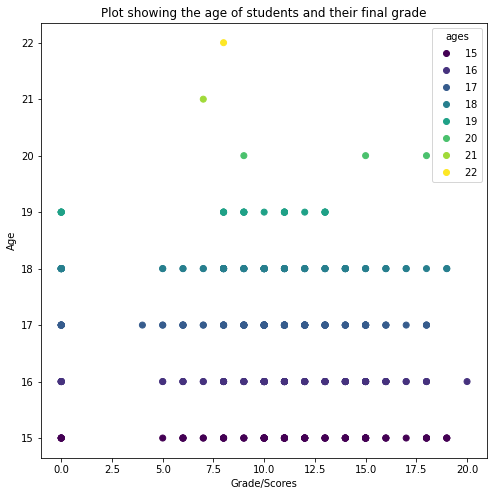

In [25]:
fig, ax = plt.subplots(figsize=(8,8))
scatterplot = ax.scatter(x = student_data['G3'],
                         y = student_data['age'],
                         c = student_data['age'])
ax.set(title="Plot showing the age of students and their final grade",
       xlabel='Grade/Scores',
       ylabel='Age');
ax.legend(*scatterplot.legend_elements(), title='ages');

From the above plot, we can see that only one age group scored 20 and is age 16

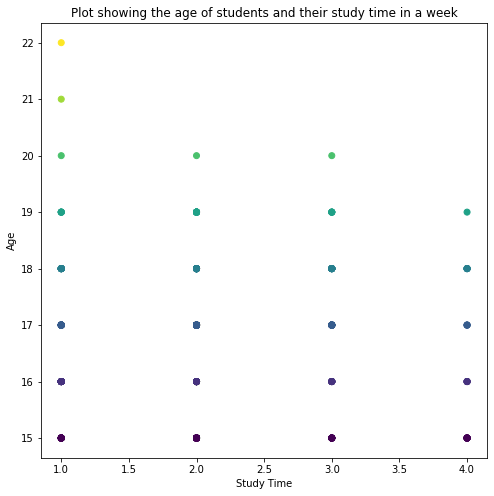

In [26]:
fig, ax = plt.subplots(figsize=(8,8))
scatter = plt.scatter(y = student_data['age'],
                      x = student_data['studytime'],
                      c = student_data['age'])
ax.set(title='Plot showing the age of students and their study time in a week',
      xlabel='Study Time',
      ylabel='Age');

From the plot above, we can see that no one above the age of 19 studied up to 4 hours a week

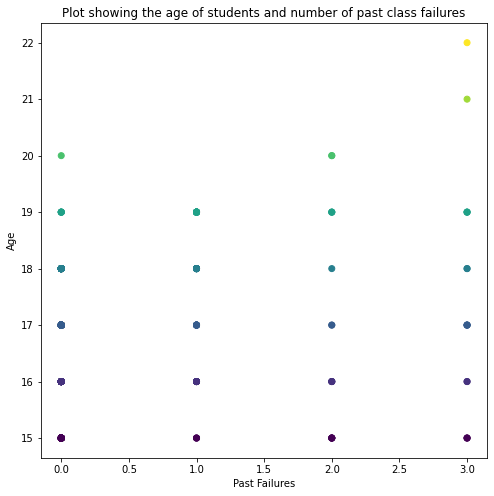

In [27]:
fig, ax = plt.subplots(figsize=(8,8))
scatter = plt.scatter(y = student_data['age'],
                      x = student_data['failures'],
                      c = student_data['age'])
ax.set(title='Plot showing the age of students and number of past class failures',
      xlabel='Past Failures',
      ylabel='Age');

# Let's pick a suitable classification algorithm to solve our problem (First let's try Random Forest Classifier)

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
clf = RandomForestClassifier(n_estimators=100)

In [29]:
# Feature matrix
X = np.array(student_data[['age','studytime','failures','absences','G1','G2']])
# Label
y = np.array(student_data['G3'])
print(X)
y

[[18  2  0  6  5  6]
 [17  2  0  4  5  5]
 [15  2  3 10  7  8]
 ...
 [21  1  3  3 10  8]
 [18  1  0  0 11 12]
 [19  1  0  5  8  9]]


array([ 6,  6, 10, 15, 10, 15, 11,  6, 19, 15,  9, 12, 14, 11, 16, 14, 14,
       10,  5, 10, 15, 15, 16, 12,  8,  8, 11, 15, 11, 11, 12, 17, 16, 12,
       15,  6, 18, 15, 11, 13, 11, 12, 18, 11,  9,  6, 11, 20, 14,  7, 13,
       13, 10, 11, 13, 10, 15, 15,  9, 16, 11, 11,  9,  9, 10, 15, 12,  6,
        8, 16, 15, 10,  5, 14, 11, 10, 10, 11, 10,  5, 12, 11,  6, 15, 10,
        8,  6, 14, 10,  7,  8, 18,  6, 10, 14, 10, 15, 10, 14,  8,  5, 17,
       14,  6, 18, 11,  8, 18, 13, 16, 19, 10, 13, 19,  9, 16, 14, 13,  8,
       13, 15, 15, 13, 13,  8, 12, 11,  9,  0, 18,  0,  0, 12, 11,  0,  0,
        0,  0, 12, 15,  0,  9, 11, 13,  0, 11,  0, 11,  0, 10,  0, 14, 10,
        0, 12,  8, 13, 10, 15, 12,  0,  7,  0, 10,  7, 12, 10, 16,  0, 14,
        0, 16, 10,  0,  9,  9, 11,  6,  9, 11,  8, 12, 17,  8, 12, 11, 11,
       15,  9, 10, 13,  9,  8, 10, 14, 15, 16, 10, 18, 10, 16, 10, 10,  6,
       11,  9,  7, 13, 10,  7,  8, 13, 14,  8, 10, 15,  4,  8,  8, 10,  6,
        0, 17, 13, 14,  7

In [30]:
y.shape

(395,)

# Fit the model and make predictions

In [31]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

# Fit/Train
clf.fit(X_train, y_train)

# Predict
predictions = clf.predict(X_test)
predictions

array([10,  6,  9,  8,  8, 11, 18, 11, 12, 15, 13, 11, 13,  5,  7, 16, 10,
       10,  0,  0, 10, 11,  8, 10,  8, 10, 10, 12, 13,  9, 14, 12, 16,  0,
       16, 15, 18, 11, 13, 15])

In the above array are the predictions on our test data

# Evaluate the model

In [32]:
clf.score(X_train, y_train)

0.9774647887323944

Our machine has trained on 97% of our train data set

In [33]:
clf.score(X_test, y_test)

0.425

Our prediction accuracy is 40% which is really poor

In [34]:
# More informative way to check our model performance
print(classification_report(y_test, predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           5       0.00      0.00      0.00         0
           6       1.00      0.50      0.67         2
           7       0.00      0.00      0.00         0
           8       0.50      0.50      0.50         4
           9       0.00      0.00      0.00         1
          10       0.86      0.55      0.67        11
          11       0.40      0.40      0.40         5
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         0
          14       1.00      0.33      0.50         3
          15       0.67      0.67      0.67         3
          16       0.00      0.00      0.00         0
          17       0.00      0.00      0.00         2
          18       0.00      0.00      0.00         2
          19       0.00      0.00      0.00         1
          20       0.00      0.00      0.00         1

    accuracy              

/home/myubuntu/Desktop/projects/ML_and_DS/sample_project/env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/myubuntu/Desktop/projects/ML_and_DS/sample_project/env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


What do we do? Let's try to do some hyperparameter tuning

In [35]:
np.random.seed(30)
for i in range(10,100,10):
    print(f"Trying model with {i} estimators...")
    clf = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)
    print(f"Model accuracy on test set: {clf.score(X_test, y_test) * 100:.2f}%")
    print("")

Trying model with 10 estimators...
Model accuracy on test set: 40.00%

Trying model with 20 estimators...
Model accuracy on test set: 42.50%

Trying model with 30 estimators...
Model accuracy on test set: 42.50%

Trying model with 40 estimators...
Model accuracy on test set: 40.00%

Trying model with 50 estimators...
Model accuracy on test set: 37.50%

Trying model with 60 estimators...
Model accuracy on test set: 42.50%

Trying model with 70 estimators...
Model accuracy on test set: 42.50%

Trying model with 80 estimators...
Model accuracy on test set: 37.50%

Trying model with 90 estimators...
Model accuracy on test set: 40.00%



The max accuracy we could get is 42.10% which is bad

Let's try another algorithm, Linear Regression

In [36]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression().fit(X_train, y_train)

# Check the accuracy
print(linear.score(X_test, y_test))

0.8325863746691323


We have 83% prediction accuracy. This is fine.

In [37]:
predictions = linear.predict(X_test)

Let's see the predictions for each student

In [38]:
for i in range(len(predictions)):
    print(f'Predicted final score: {np.rint(predictions[i])}, Actual final score: {y_test[i]}')
    print("")

Predicted final score: 10.0, Actual final score: 10

Predicted final score: 4.0, Actual final score: 6

Predicted final score: 10.0, Actual final score: 10

Predicted final score: 8.0, Actual final score: 10

Predicted final score: 8.0, Actual final score: 0

Predicted final score: 11.0, Actual final score: 9

Predicted final score: 19.0, Actual final score: 20

Predicted final score: 11.0, Actual final score: 12

Predicted final score: 11.0, Actual final score: 10

Predicted final score: 18.0, Actual final score: 18

Predicted final score: 13.0, Actual final score: 14

Predicted final score: 10.0, Actual final score: 11

Predicted final score: 14.0, Actual final score: 14

Predicted final score: 6.0, Actual final score: 6

Predicted final score: 8.0, Actual final score: 8

Predicted final score: 15.0, Actual final score: 17

Predicted final score: 9.0, Actual final score: 10

Predicted final score: 10.0, Actual final score: 10

Predicted final score: 3.0, Actual final score: 0

Predic

So we can see that for this problem, the suitable algorithm/model to use is Linear Regression

In [18]:
X_test.shape

(40, 6)

In [125]:
# Let's save this model
pickle.dump(clf, open('rstudent_prediction.pkl', 'wb'))

In [126]:
# To load this model
load_model = pickle.load(open('random_forest_model.pkl', 'rb'))